# GUC NETW 1003 Kmeans Assginmnet 

Objective: exercise is to learn how to use build and use  kmeans clustering algortrithm    

At the end of this lab you will be able to
> 1. Build and run a K-means algorithm.
> 2. Know how to evalute K-means Algorithm 
> 2. Understand the effect of the parmeters ont he perfromance of the algorithm .
> 3. Understand the effect of distance.

## 1. Wirte K means function 

import required libraries 

In [1]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
mydf= pd.read_csv("Customer data.csv")
# mydf.head()

In [2]:
del mydf['ID']

> ### 1.1. Code for the distance function 

write a function to calculate the distance between a set of cluster centroids and all the data points 

Cluster_Distances = GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type) 
* The function shoud be able to handel data points with any number of features and any number of points 
* The function should be able to handle any K number of cluster centroids 
* To inrease speed do that in matrix format using numpy
* This should produce a matrix with rows equal to data points columns equal K 
* You should be able to calculate different types of Distance. In this assginmnet you are required to implement the following two 
    - Ecluidian distance
    - Pearson correlation distance
  

In [3]:
def EculidDis(row1 , row2): 
    dist=0
    for i in range(len(row1)):
        f1=row1[i]
        f2=row2[i] 
        dist+=np.square(abs(f1 - f2))
    distance = np.sqrt(dist) # euclid distance formula
    return distance

row1=mydf.iloc[0].tolist()
row2=mydf.iloc[1].tolist()
EculidDis(row1 , row2)
x=[row1,row2]

In [4]:
def GUC_Distance ( Cluster_Centroids, dff, Distance_Type ):
    
    dic={}
    if(Distance_Type=="Ecluidian"):
        for i in range(len( Cluster_Centroids)):
            x=[]
            for ind in dff.index:
                datapoint=dff.iloc[ind].tolist()
                dis=EculidDis(datapoint , Cluster_Centroids[i])
                x.append(dis)
            dic[i]=x
    
        return pd.DataFrame(dic)
    else:
        mydic=pd.DataFrame(distance.cdist(dff,Cluster_Centroids,"correlation"))
    return mydic

In [5]:
from scipy.spatial import distance
c1=mydf.iloc[5].tolist()
c2=mydf.iloc[10].tolist()
c3=mydf.iloc[11].tolist()
Cluster_Centroids=[c1,c2,c3]

mydic=pd.DataFrame(distance.cdist(mydf.head(15),Cluster_Centroids,"correlation"))
# distance.cdist(mydf.head(15),Cluster_Centroids,"correlation")

> ### 1.2. Code for K means function 

> Loop until a stopping condition 

> > in the loop do the following 
> > 1. Cluster Assginmnet 
> > > * Use the GUC_Distance to calculate between each cluster head and all the points 
> > > * Find the value and index of the minimum distance  for each row. 
> > > * for each point in the row use the index of the minmum distance to represent the cluster Centroid that this point will belong to.

> > > * Calculate and record the mean square distance for each cluster  
> > > * Use the mean square distances to calculate a stopping condition (e.g the sum of mean distances)
> > 2. Updtate Centroids  


> > > * Update the value for the cluster heads by calculating the mean value for the points in each cluster 

> > >  * Calculate the Cluster Metric (Distortion Function)
> > > > a number indicating the how good the clusters are . An example cluster metric is the  (sum of squared error between each point and its cluster center) 

In [7]:
import random
def generate_randomCentroids(K,df):
    X=[]
    data=[]
    for i in range (K):
        n=random.randint(0, df.shape[0]-1)
        while n in X: 
            n=random.randint(0, df.shape[0]-1)
        X.append(n)
        data.append(df.iloc[n].tolist())
    return X,data

Data_points=mydf.head(10)    
generate_randomCentroids(4 , Data_points)

([0, 3, 7, 8],
 [[0, 0, 67, 2, 124670, 1, 2],
  [0, 0, 45, 1, 171565, 1, 1],
  [0, 0, 35, 1, 193621, 2, 1],
  [0, 1, 61, 2, 151591, 0, 0]])

In [8]:
def closest_cluster( cluster_distance_matric):
    distancedic={}
    indexdic={}
     
    for ind in cluster_distance_matric.index:
               
                distancelist=cluster_distance_matric.iloc[ind].tolist()
                
                minDis= min( distancelist)
                MinDistanceIndex=  distancelist. index( min( distancelist)) 
                 
                clusternumber= MinDistanceIndex
                if clusternumber not in distancedic:
                    distancedic[clusternumber]=[minDis]
                    indexdic[clusternumber]=[ind]
                else: 
                    distancedic[clusternumber].append(minDis)
                    indexdic[clusternumber].append(ind)
   
    return  distancedic , indexdic


In [9]:
def calculateDiff(x, y):
    difference = [] 
    zip_object = zip(x, y)
    for list1_i, list2_i in zip_object:
        difference.append(list1_i-list2_i)
    
    summ=0
    for d in difference:
        summ+=abs(d)
    return  summ


In [10]:
def calculateMeansquare(DataPointsIndex, DF):
    mydf=DF.iloc[DataPointsIndex]
    x=mydf.mean().tolist()
    
    return x 
    

In [11]:
def Dis(row1 , row2): 
    dist=0 
    for i in range(len(row1)):
        f1=row1[i]
        f2=row2[i] 
        dist+=np.square(abs(f1 - f2))
   
    return dist

In [12]:
def GUC_Kmean(Data_points,Number_of_Clusters,Distance_Type):
    diff=1000
    cluster=[]
    indices,centroids=generate_randomCentroids(Number_of_Clusters, Data_points)
    
    while(diff>0): 
        cluster_distance_Matric=GUC_Distance(centroids,Data_points, Distance_Type )
         
        old_distancemean=cluster_distance_Matric.mean().tolist()
        distancedic,indexdic=closest_cluster(cluster_distance_Matric)
     
        newCentroids=[]
        for k, v in indexdic.items():
        
              newCentroids.append(calculateMeansquare(v, Data_points))
            
        NewCluster_distance_Matric=GUC_Distance ( newCentroids,Data_points, Distance_Type )
        new_distancemean=NewCluster_distance_Matric.mean().tolist()
        diff=calculateDiff(old_distancemean, new_distancemean)
        centroids=newCentroids.copy()
    centers=[]
    for i in range(len(centroids)):
        distancelist=NewCluster_distance_Matric.iloc[:,i].tolist() 
        MinDistanceIndex= distancelist.index(min(distancelist))
        centers.append(Data_points.iloc[MinDistanceIndex])
    print("Points belonging to each cluster:",indexdic)  
    distortionList=calculateDistortion(centers, Data_points ,indexdic) 
    return NewCluster_distance_Matric,centers,distortionList

In [13]:
#summation of distance between center w datapoints belonging to such data points
def calculateDistortion(centers, data_points , indexdic):
    DistortionList=[]
    for i in range(len(centers)):
        centerlist=indexdic[i]  #list of points that belong to this center
        summ=0
        for dp in centerlist:
            dataPoint=data_points.iloc[dp].tolist()
            dis=Dis(dataPoint , centers[i])
            summ+=dis
        summ=summ/len(centerlist)
        DistortionList.append(summ)
    return DistortionList

In [14]:
def getDistortionforAllK(Data_points,Distance_Type):
    AllDistortions=[]
    for k in range(1,11):
         NewCluster_distance_Matric,centers, distortionList=GUC_Kmean (Data_points, k ,Distance_Type ) 
         result = min(distortionList)
         AllDistortions.append(result)
    return AllDistortions,result

<ipython-input-18-2059aacee635>:7: RuntimeWarning: invalid value encountered in sqrt
  distance = np.sqrt(dist) # euclid distance formula


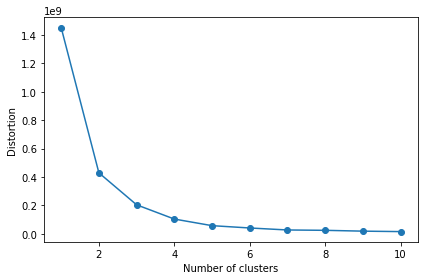

In [31]:
# ELBOW METHOD
# Best K value here is 3
distortions,result=getDistortionforAllK(mydf,"Ecluidian")
elbow_method(distortions)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

In [40]:
def elbow_method(x):
    maxdiff=0
    k=0
    for i in range(0,len(x)-1):
        diff=x[i]-x[i+1]
        if(diff>maxdiff):
            maxdiff=diff
            k=i+2
    return k

<ipython-input-3-2059aacee635>:7: RuntimeWarning: invalid value encountered in sqrt
  distance = np.sqrt(dist) # euclid distance formula


Points belonging to each cluster: {0: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 2

Points belonging to each cluster: {0: [0, 2, 10, 11, 12, 13, 14, 15, 16, 20, 22, 23, 24, 25, 26, 28, 31, 33, 35, 37, 38, 39, 41, 42, 47, 48, 49, 50, 52, 53, 54, 55, 59, 60, 61, 64, 66, 68, 69, 71, 73, 76, 79, 81, 82, 83, 84, 85, 86, 89, 90, 91, 92, 93, 96, 97, 98, 100, 101, 102, 103, 104, 110, 111, 112, 114, 115, 117, 120, 122, 123, 124, 125, 126, 127, 129, 132, 133, 135, 137, 138, 139, 140, 143, 144, 146, 147, 148, 150, 151, 155, 156, 157, 159, 160, 161, 162, 164, 166, 168, 169, 170, 171, 173, 174, 176, 177, 178, 179, 182, 184, 185, 187, 188, 189, 191, 192, 193, 194, 196, 197, 198, 201, 202, 203, 204, 206, 207, 208, 210, 211, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 228, 229, 231, 232, 233, 234, 235, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 254, 255, 256, 257, 258, 259, 260, 261, 263, 264, 265, 267, 269, 270, 273, 275, 276, 277, 281, 282, 283, 286, 288, 289, 290, 296, 297, 298, 300, 302, 303, 306, 307, 308, 309, 310, 313, 314, 

Points belonging to each cluster: {0: [0, 1, 4, 5, 6, 8, 11, 16, 17, 19, 20, 21, 23, 27, 28, 30, 31, 32, 34, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 48, 49, 53, 54, 58, 59, 61, 64, 65, 66, 67, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 85, 88, 91, 93, 96, 97, 98, 103, 107, 109, 110, 112, 113, 114, 115, 118, 123, 124, 128, 129, 131, 133, 137, 138, 142, 145, 147, 148, 149, 150, 152, 156, 158, 160, 162, 164, 165, 167, 168, 169, 172, 174, 176, 177, 178, 179, 189, 191, 192, 194, 195, 197, 198, 200, 202, 206, 208, 209, 210, 212, 214, 216, 217, 219, 223, 224, 230, 231, 232, 235, 237, 239, 241, 242, 244, 247, 248, 250, 251, 252, 253, 255, 258, 261, 266, 267, 270, 271, 273, 275, 276, 278, 279, 280, 281, 283, 284, 286, 288, 289, 296, 298, 299, 301, 305, 311, 312, 315, 317, 322, 323, 326, 327, 328, 331, 334, 335, 338, 340, 342, 344, 349, 352, 353, 354, 356, 357, 360, 362, 366, 367, 368, 369, 370, 371, 376, 380, 383, 388, 390, 391, 392, 394, 397, 398, 399, 401, 404, 406, 409, 410, 412, 415, 419, 420,

Points belonging to each cluster: {0: [0, 10, 11, 12, 14, 16, 20, 24, 28, 31, 35, 37, 38, 41, 42, 48, 49, 53, 59, 60, 61, 64, 66, 68, 69, 76, 79, 83, 85, 86, 90, 91, 93, 98, 101, 103, 104, 110, 111, 112, 114, 115, 117, 120, 124, 125, 127, 129, 133, 135, 137, 138, 139, 143, 144, 146, 147, 148, 150, 151, 156, 160, 161, 162, 164, 166, 168, 169, 173, 174, 176, 177, 178, 179, 184, 185, 188, 189, 191, 193, 194, 196, 197, 198, 202, 206, 207, 208, 210, 211, 214, 216, 217, 219, 223, 224, 225, 229, 231, 232, 235, 237, 238, 239, 240, 241, 242, 243, 244, 246, 247, 248, 250, 251, 252, 254, 255, 257, 259, 260, 261, 263, 265, 267, 270, 273, 275, 276, 281, 282, 283, 286, 288, 289, 296, 298, 303, 306, 308, 315, 317, 321, 324, 329, 331, 334, 337, 338, 344, 347, 350, 351, 354, 356, 359, 360, 365, 366, 367, 368, 370, 372, 376, 380, 382, 383, 384, 385, 389, 390, 391, 393, 397, 398, 399, 400, 401, 404, 405, 406, 410, 413, 414, 419, 421, 424, 425, 426, 430, 433, 434, 435, 441, 442, 446, 447, 452, 454, 456, 4

Points belonging to each cluster: {0: [0, 5, 11, 16, 19, 20, 21, 23, 28, 31, 36, 37, 38, 41, 42, 44, 45, 46, 48, 49, 54, 61, 64, 65, 67, 72, 73, 74, 76, 79, 81, 85, 93, 96, 97, 98, 109, 110, 112, 114, 115, 123, 128, 129, 137, 138, 142, 145, 147, 148, 150, 156, 158, 160, 162, 164, 165, 167, 168, 176, 177, 178, 189, 192, 194, 195, 197, 198, 200, 202, 214, 217, 219, 224, 230, 231, 232, 235, 237, 242, 244, 253, 255, 258, 261, 271, 273, 278, 279, 283, 286, 288, 296, 298, 301, 305, 311, 312, 317, 322, 323, 328, 331, 338, 349, 353, 354, 356, 360, 362, 366, 367, 368, 369, 370, 371, 388, 390, 394, 397, 398, 399, 404, 409, 412, 415, 423, 424, 427, 430, 432, 440, 447, 453, 454, 455, 456, 457, 459, 460, 465, 470, 473, 476, 477, 483, 484, 485, 486, 499, 500, 501, 502, 503, 512, 514, 518, 520, 523, 526, 531, 535, 537, 539, 541, 542, 553, 556, 557, 560, 565, 568, 571, 576, 578, 589, 591, 592, 594, 599, 600, 605, 611, 613, 617, 618, 620, 622, 624, 626, 627, 630, 636, 639, 644, 646, 647, 658, 662, 663,

Points belonging to each cluster: {0: [0, 11, 16, 20, 28, 31, 37, 38, 41, 42, 48, 49, 53, 59, 61, 64, 76, 79, 85, 91, 93, 98, 103, 110, 112, 114, 115, 124, 129, 133, 137, 138, 147, 148, 150, 156, 160, 162, 164, 168, 169, 174, 176, 177, 178, 179, 189, 191, 194, 197, 198, 202, 206, 208, 210, 214, 216, 217, 219, 223, 224, 231, 232, 235, 237, 239, 241, 242, 244, 247, 248, 250, 251, 252, 255, 261, 267, 273, 281, 283, 286, 288, 296, 298, 317, 331, 334, 338, 344, 354, 356, 360, 366, 367, 368, 370, 376, 380, 383, 390, 397, 398, 399, 401, 404, 406, 419, 421, 424, 425, 430, 442, 446, 447, 452, 454, 456, 457, 459, 460, 468, 470, 473, 475, 476, 484, 486, 489, 492, 499, 500, 503, 512, 514, 518, 521, 523, 526, 530, 535, 539, 541, 546, 553, 556, 558, 560, 562, 565, 575, 576, 577, 578, 586, 589, 591, 592, 599, 600, 604, 605, 611, 613, 617, 620, 622, 626, 627, 629, 630, 636, 639, 646, 647, 648, 652, 655, 660, 662, 667, 673, 674, 680, 686, 687, 688, 692, 704, 707, 716, 717, 718, 723, 725, 734, 737, 739,

Points belonging to each cluster: {0: [0, 5, 11, 16, 19, 23, 36, 37, 41, 42, 44, 45, 46, 48, 49, 54, 61, 67, 72, 73, 74, 76, 79, 81, 85, 93, 96, 97, 109, 110, 112, 114, 115, 123, 128, 129, 137, 138, 142, 145, 147, 148, 156, 158, 160, 162, 164, 165, 168, 176, 177, 178, 189, 192, 194, 198, 200, 202, 214, 217, 219, 224, 230, 231, 232, 235, 237, 242, 244, 253, 255, 258, 261, 271, 278, 279, 283, 286, 288, 296, 301, 305, 311, 312, 317, 322, 328, 331, 338, 349, 353, 354, 356, 360, 362, 368, 369, 371, 388, 390, 394, 397, 399, 404, 409, 412, 415, 423, 424, 430, 432, 440, 447, 453, 454, 455, 456, 459, 460, 465, 470, 473, 476, 483, 484, 486, 499, 501, 502, 503, 512, 514, 523, 531, 535, 537, 541, 542, 553, 556, 557, 560, 565, 568, 576, 589, 591, 592, 594, 599, 600, 605, 617, 618, 620, 622, 624, 626, 630, 636, 639, 644, 646, 647, 658, 662, 663, 667, 668, 669, 673, 676, 680, 687, 688, 692, 695, 703, 704, 707, 716, 717, 718, 721, 723, 734, 739, 740, 742, 743, 748, 753, 757, 764, 768, 773, 776, 780, 7

Points belonging to each cluster: {0: [0, 11, 16, 20, 28, 31, 37, 38, 41, 42, 48, 49, 53, 61, 64, 76, 79, 85, 91, 93, 98, 103, 110, 112, 115, 124, 129, 133, 137, 138, 147, 148, 150, 156, 160, 162, 164, 168, 169, 176, 177, 178, 179, 189, 191, 194, 197, 198, 202, 210, 214, 217, 219, 224, 231, 232, 235, 237, 239, 241, 242, 244, 248, 252, 255, 261, 273, 283, 286, 288, 296, 298, 317, 331, 334, 338, 344, 354, 356, 360, 366, 367, 368, 370, 397, 398, 399, 404, 406, 424, 425, 430, 442, 447, 454, 456, 457, 459, 460, 470, 473, 475, 476, 484, 486, 499, 500, 503, 512, 514, 518, 521, 523, 526, 530, 535, 539, 541, 546, 553, 556, 558, 560, 565, 576, 578, 586, 589, 591, 592, 599, 604, 605, 611, 613, 617, 620, 622, 626, 627, 629, 630, 636, 639, 646, 647, 648, 652, 655, 662, 667, 673, 680, 687, 688, 692, 704, 707, 716, 717, 718, 723, 734, 739, 740, 742, 743, 748, 749, 757, 764, 767, 768, 776, 777, 785, 787, 790, 795, 800, 802, 807, 813, 821, 822, 826, 827, 839, 840, 844, 848, 851, 855, 858, 859, 862, 865

Points belonging to each cluster: {0: [0, 11, 16, 23, 31, 37, 41, 42, 48, 49, 54, 61, 73, 76, 79, 81, 85, 93, 96, 97, 98, 110, 112, 114, 115, 123, 129, 137, 138, 147, 148, 156, 160, 162, 164, 168, 176, 177, 178, 189, 192, 194, 197, 198, 200, 202, 214, 217, 219, 224, 231, 232, 235, 237, 242, 244, 255, 258, 261, 271, 273, 278, 283, 286, 288, 296, 317, 331, 338, 354, 356, 360, 362, 368, 369, 390, 397, 398, 399, 404, 424, 430, 432, 447, 454, 456, 457, 459, 460, 470, 473, 476, 484, 486, 499, 503, 512, 514, 523, 526, 531, 535, 539, 541, 553, 556, 560, 565, 576, 578, 589, 591, 592, 594, 599, 600, 605, 617, 620, 622, 624, 626, 630, 636, 639, 644, 646, 647, 662, 663, 667, 673, 676, 680, 687, 688, 692, 704, 707, 716, 717, 718, 723, 734, 739, 740, 742, 743, 748, 757, 764, 768, 773, 776, 777, 780, 785, 795, 802, 807, 813, 814, 821, 826, 827, 839, 840, 844, 845, 848, 851, 858, 859, 865, 867, 871, 876, 878, 886, 899, 901, 904, 907, 910, 912, 916, 918, 928, 933, 944, 949, 956, 959, 961, 971, 974, 976

Points belonging to each cluster: {0: [0, 11, 16, 23, 37, 41, 42, 48, 49, 54, 61, 73, 76, 79, 81, 85, 93, 96, 97, 110, 112, 114, 115, 123, 129, 137, 138, 147, 148, 156, 160, 162, 164, 168, 176, 177, 178, 189, 192, 194, 198, 200, 202, 214, 217, 219, 224, 231, 232, 235, 237, 242, 244, 255, 258, 261, 271, 278, 283, 286, 288, 296, 317, 331, 338, 354, 356, 360, 362, 368, 369, 390, 394, 397, 399, 404, 424, 430, 432, 447, 454, 456, 459, 460, 470, 473, 476, 484, 486, 499, 503, 512, 514, 523, 531, 535, 541, 553, 556, 560, 565, 576, 589, 591, 592, 594, 599, 600, 605, 617, 620, 622, 624, 626, 630, 636, 639, 644, 646, 647, 662, 663, 667, 673, 676, 680, 687, 688, 692, 704, 707, 716, 717, 718, 723, 734, 739, 740, 742, 743, 748, 757, 764, 768, 773, 776, 780, 785, 802, 813, 814, 821, 826, 827, 839, 840, 844, 845, 851, 858, 859, 865, 867, 871, 876, 878, 886, 899, 901, 904, 907, 910, 912, 916, 918, 928, 933, 944, 949, 956, 959, 961, 963, 971, 976, 977, 994, 1000, 1006, 1008, 1010, 1014, 1016, 1017, 1020

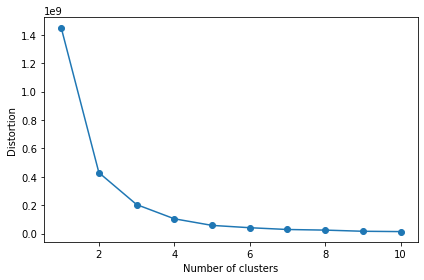

In [41]:
distortions,result=getDistortionforAllK(mydf,"Ecluidian")
best_k=elbow_method(distortions)
print("Best K value:",best_k)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

Points belonging to each cluster: {0: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 2

Points belonging to each cluster: {0: [0, 2, 4, 6, 8, 13, 15, 16, 20, 22, 25, 26, 29, 33, 44, 47, 50, 54, 55, 61, 62, 68, 71, 72, 75, 81, 83, 84, 90, 91, 92, 96, 100, 115, 122, 123, 126, 132, 133, 135, 137, 139, 146, 147, 150, 151, 156, 157, 159, 170, 176, 177, 179, 182, 184, 186, 187, 200, 201, 204, 206, 209, 211, 213, 214, 215, 219, 220, 231, 233, 234, 237, 239, 241, 246, 250, 251, 256, 259, 261, 263, 264, 265, 267, 277, 281, 282, 283, 288, 289, 297, 298, 300, 302, 303, 307, 309, 310, 313, 314, 316, 317, 318, 324, 325, 330, 339, 345, 348, 354, 355, 356, 360, 364, 365, 377, 379, 380, 397, 398, 399, 400, 403, 406, 413, 416, 422, 429, 430, 438, 439, 443, 445, 449, 461, 463, 465, 466, 469, 472, 478, 479, 486, 487, 488, 493, 494, 497, 498, 502, 505, 514, 515, 516, 518, 519, 527, 529, 532, 536, 539, 541, 544, 545, 548, 551, 554, 559, 560, 561, 566, 573, 574, 579, 581, 583, 587, 588, 589, 590, 595, 597, 602, 606, 609, 611, 619, 624, 629, 631, 635, 640, 641, 649, 651, 652, 656, 662, 664, 674

Points belonging to each cluster: {0: [0, 2, 13, 22, 25, 26, 33, 55, 71, 83, 84, 90, 91, 92, 96, 100, 123, 126, 137, 157, 159, 179, 182, 187, 204, 215, 219, 234, 237, 241, 246, 259, 261, 263, 264, 277, 281, 282, 283, 289, 297, 300, 303, 310, 316, 345, 360, 364, 379, 403, 422, 429, 430, 438, 439, 443, 445, 465, 472, 494, 505, 514, 516, 527, 529, 536, 541, 544, 581, 588, 589, 590, 619, 624, 629, 640, 641, 649, 651, 656, 664, 678, 680, 697, 723, 726, 732, 747, 750, 756, 765, 769, 774, 798, 799, 800, 801, 807, 809, 823, 835, 838, 843, 848, 849, 853, 883, 885, 892, 925, 928, 929, 941, 943, 948, 950, 957, 958, 972, 976, 978, 987, 989, 1000, 1004, 1006, 1008, 1010, 1016, 1017, 1023, 1026, 1032, 1044, 1051, 1053, 1063, 1064, 1066, 1071, 1075, 1077, 1079, 1081, 1087, 1088, 1096, 1099, 1100, 1112, 1115, 1121, 1138, 1142, 1143, 1207, 1239, 1246, 1276, 1291, 1292, 1301, 1316, 1324, 1358, 1368, 1369, 1372, 1373, 1374, 1375, 1379, 1381, 1390, 1391, 1393, 1394, 1397, 1399, 1410, 1428, 1432, 1433, 144

Points belonging to each cluster: {0: [0, 2, 13, 22, 26, 33, 71, 83, 84, 90, 126, 137, 157, 179, 182, 187, 204, 234, 259, 263, 277, 297, 300, 316, 364, 379, 422, 429, 430, 438, 443, 516, 527, 529, 544, 588, 590, 619, 629, 640, 649, 656, 678, 697, 756, 769, 774, 799, 807, 823, 849, 883, 929, 943, 948, 950, 972, 978, 989, 1004, 1010, 1053, 1075, 1081, 1121, 1143, 1239, 1301, 1324, 1368, 1374, 1381, 1390, 1391, 1397, 1399, 1410, 1432, 1433, 1444, 1446, 1457, 1469, 1480, 1503, 1537, 1547, 1554, 1569, 1570, 1572, 1576, 1578, 1589, 1607, 1609, 1611, 1639, 1675, 1686, 1695, 1697, 1707, 1714, 1724, 1726, 1753, 1762, 1771, 1785, 1789, 1791, 1795, 1797, 1800, 1811, 1816, 1821, 1828, 1831, 1839, 1858, 1860, 1862, 1894, 1898, 1926, 1937, 1946, 1948, 1958, 1965, 1975, 1977, 1992], 1: [1, 5, 7, 9, 10, 11, 12, 17, 18, 19, 24, 30, 31, 32, 34, 35, 36, 40, 41, 43, 45, 49, 51, 57, 58, 59, 60, 63, 64, 67, 69, 70, 79, 85, 86, 87, 88, 93, 95, 99, 101, 102, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 1

Points belonging to each cluster: {0: [0, 2, 8, 16, 20, 22, 25, 26, 44, 54, 55, 61, 75, 83, 84, 90, 91, 92, 96, 100, 123, 126, 133, 137, 139, 147, 159, 179, 182, 201, 204, 211, 215, 219, 231, 234, 237, 241, 246, 251, 256, 259, 261, 263, 264, 277, 281, 282, 283, 289, 297, 302, 303, 307, 310, 316, 325, 345, 356, 360, 364, 379, 403, 416, 422, 439, 445, 465, 472, 478, 479, 487, 488, 494, 498, 505, 514, 516, 527, 536, 541, 545, 551, 579, 581, 588, 589, 609, 611, 624, 629, 631, 635, 641, 649, 651, 656, 662, 664, 680, 693, 709, 713, 723, 726, 732, 745, 747, 750, 765, 779, 782, 798, 800, 801, 807, 809, 811, 813, 816, 835, 838, 843, 848, 853, 885, 891, 892, 908, 925, 928, 929, 941, 943, 948, 950, 956, 957, 958, 969, 975, 976, 978, 984, 987, 989, 990, 991, 994, 1000, 1001, 1006, 1008, 1010, 1016, 1017, 1023, 1026, 1032, 1035, 1040, 1044, 1051, 1053, 1056, 1063, 1064, 1066, 1071, 1072, 1077, 1079, 1081, 1087, 1088, 1096, 1099, 1100, 1102, 1106, 1109, 1112, 1115, 1121, 1134, 1138, 1142, 1151, 1152

Points belonging to each cluster: {0: [0, 2, 22, 25, 26, 71, 83, 84, 90, 91, 92, 123, 126, 137, 157, 159, 179, 182, 204, 219, 234, 237, 246, 259, 263, 264, 277, 282, 283, 297, 316, 345, 360, 364, 379, 403, 422, 430, 439, 443, 445, 465, 472, 494, 516, 527, 529, 541, 581, 588, 589, 619, 624, 629, 641, 649, 656, 664, 678, 723, 732, 747, 765, 774, 798, 800, 801, 807, 809, 823, 838, 848, 853, 892, 928, 929, 943, 948, 950, 957, 976, 978, 989, 1000, 1008, 1010, 1016, 1017, 1023, 1032, 1044, 1053, 1079, 1081, 1087, 1088, 1096, 1100, 1112, 1115, 1121, 1142, 1143, 1207, 1239, 1246, 1276, 1291, 1301, 1316, 1369, 1372, 1373, 1374, 1375, 1379, 1381, 1390, 1391, 1393, 1394, 1397, 1428, 1433, 1456, 1457, 1467, 1469, 1473, 1480, 1537, 1551, 1552, 1553, 1554, 1560, 1569, 1570, 1572, 1573, 1576, 1595, 1600, 1607, 1611, 1619, 1627, 1634, 1639, 1643, 1647, 1675, 1686, 1692, 1695, 1697, 1714, 1724, 1725, 1726, 1741, 1753, 1762, 1767, 1771, 1772, 1779, 1785, 1789, 1791, 1792, 1797, 1800, 1811, 1816, 1821, 1

Points belonging to each cluster: {0: [0, 2, 13, 22, 25, 26, 33, 71, 83, 84, 90, 126, 137, 157, 179, 182, 204, 219, 234, 259, 263, 277, 282, 283, 297, 316, 345, 364, 379, 422, 430, 439, 443, 445, 516, 527, 529, 544, 588, 590, 619, 629, 649, 656, 678, 723, 732, 769, 774, 799, 807, 823, 848, 929, 943, 948, 950, 972, 978, 989, 1010, 1016, 1017, 1032, 1044, 1053, 1081, 1087, 1088, 1096, 1112, 1121, 1143, 1239, 1301, 1373, 1374, 1381, 1390, 1391, 1393, 1394, 1397, 1399, 1428, 1433, 1457, 1467, 1469, 1473, 1480, 1537, 1554, 1560, 1569, 1570, 1572, 1576, 1600, 1607, 1611, 1639, 1643, 1647, 1675, 1686, 1695, 1697, 1714, 1724, 1726, 1753, 1762, 1767, 1771, 1785, 1789, 1791, 1797, 1800, 1811, 1816, 1821, 1828, 1831, 1839, 1858, 1862, 1894, 1898, 1907, 1926, 1937, 1943, 1946, 1948, 1965, 1975, 1977, 1992], 1: [1, 7, 9, 11, 17, 18, 32, 40, 43, 51, 57, 58, 63, 67, 70, 79, 93, 99, 105, 108, 113, 116, 118, 130, 134, 136, 141, 142, 152, 153, 154, 167, 180, 181, 194, 205, 208, 217, 226, 230, 236, 258, 

Points belonging to each cluster: {0: [0, 2, 13, 22, 26, 33, 71, 83, 84, 126, 137, 157, 179, 182, 234, 259, 263, 277, 297, 316, 364, 379, 422, 430, 443, 516, 527, 529, 544, 588, 590, 619, 629, 649, 656, 678, 769, 774, 799, 807, 823, 849, 929, 943, 948, 972, 978, 989, 1010, 1053, 1143, 1239, 1301, 1374, 1381, 1390, 1391, 1397, 1399, 1457, 1469, 1480, 1547, 1554, 1569, 1570, 1572, 1576, 1578, 1607, 1611, 1639, 1675, 1686, 1697, 1714, 1726, 1753, 1762, 1771, 1785, 1789, 1791, 1795, 1797, 1800, 1811, 1816, 1821, 1828, 1831, 1839, 1858, 1862, 1926, 1937, 1946, 1948, 1965, 1975, 1977], 1: [1, 7, 9, 17, 18, 43, 51, 57, 58, 63, 67, 70, 79, 93, 99, 105, 108, 113, 116, 118, 130, 134, 136, 141, 152, 153, 154, 167, 180, 181, 194, 205, 217, 226, 236, 258, 272, 280, 287, 291, 295, 296, 311, 312, 320, 332, 333, 340, 342, 357, 367, 381, 391, 395, 402, 408, 410, 417, 418, 420, 425, 431, 444, 450, 470, 477, 495, 496, 507, 517, 523, 525, 563, 572, 603, 605, 612, 613, 616, 618, 637, 645, 665, 673, 675, 67

Points belonging to each cluster: {0: [0, 2, 13, 22, 26, 33, 71, 83, 84, 126, 157, 179, 234, 259, 277, 297, 316, 364, 379, 422, 430, 443, 516, 527, 529, 544, 588, 590, 619, 629, 649, 678, 769, 774, 799, 807, 823, 849, 929, 943, 972, 1053, 1143, 1301, 1374, 1391, 1397, 1399, 1457, 1469, 1547, 1569, 1570, 1578, 1607, 1611, 1686, 1697, 1714, 1726, 1762, 1771, 1785, 1789, 1791, 1795, 1797, 1800, 1811, 1816, 1821, 1828, 1831, 1839, 1858, 1862, 1926, 1937, 1948, 1965, 1975], 1: [1, 9, 17, 18, 43, 51, 57, 58, 63, 67, 70, 79, 93, 105, 113, 116, 118, 130, 134, 136, 141, 152, 153, 154, 167, 180, 181, 194, 205, 217, 226, 236, 258, 272, 280, 287, 291, 295, 296, 311, 320, 332, 333, 340, 342, 357, 381, 391, 395, 402, 408, 410, 417, 418, 420, 431, 444, 450, 470, 477, 496, 507, 517, 523, 563, 572, 605, 612, 616, 618, 637, 645, 665, 675, 677, 706, 714, 721, 736, 743, 744, 753, 763, 771, 778, 805, 812, 818, 832, 860, 865, 887, 895, 905, 915, 921, 945, 952, 953, 982, 983, 988, 1003, 1028, 1060, 1074, 108

Points belonging to each cluster: {0: [0, 2, 13, 22, 26, 33, 71, 83, 84, 126, 157, 179, 234, 259, 277, 297, 316, 364, 379, 422, 430, 443, 516, 527, 529, 544, 588, 590, 619, 629, 649, 678, 769, 774, 799, 807, 823, 849, 929, 943, 972, 1053, 1143, 1301, 1374, 1391, 1397, 1399, 1457, 1469, 1547, 1569, 1570, 1578, 1607, 1611, 1686, 1697, 1714, 1726, 1762, 1771, 1785, 1789, 1791, 1795, 1797, 1800, 1811, 1816, 1821, 1828, 1831, 1839, 1858, 1862, 1926, 1937, 1948, 1965, 1975], 1: [1, 9, 17, 43, 58, 63, 67, 93, 105, 113, 116, 118, 130, 134, 136, 152, 153, 167, 180, 226, 236, 272, 280, 287, 291, 295, 296, 332, 333, 340, 381, 395, 408, 417, 420, 431, 450, 496, 517, 572, 616, 618, 637, 665, 675, 677, 706, 714, 736, 744, 763, 771, 805, 812, 818, 832, 860, 865, 887, 895, 915, 921, 945, 953, 982, 1003, 1060, 1074, 1114, 1200, 1235, 1306], 2: [3, 5, 14, 24, 27, 28, 39, 45, 46, 52, 53, 56, 60, 66, 74, 76, 78, 80, 82, 97, 102, 109, 110, 114, 138, 158, 160, 162, 169, 171, 175, 183, 190, 192, 193, 196, 20

Best K value: 2


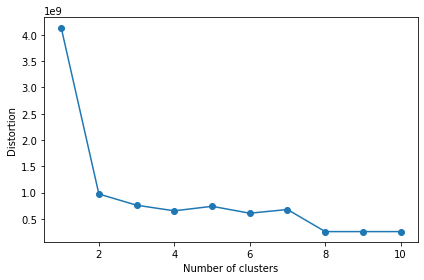

In [42]:
distortions,result=getDistortionforAllK(mydf,"pearson")
best_k=elbow_method(distortions)
print("Best K value:",best_k)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

## 2. Display Results 

* below is a an example fuction that displayes Clusters in 2D 

* You need to change the function so that is can display an n dimension data in the form of pairs of subplot 2D figures 

* The function is a helper function that is originaly be found in 
https://www.coursera.org/learn/ibm-unsupervised-learning/


In [26]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

> #### 2.1. helper Display function 

In [27]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

> #### 2.2. Example 1 : Circular Data Gen and display 

* below is an example of how to use the funciton 
  *  prepare the figure size and background 
   > * this part can be replaced by a number of subplots 
  
  * Produce a data set that represent the x and y o coordinates of a circle 
   > * this part can be replaced by data that you import froma file 
  
  * Data is displayed 
   > * to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 

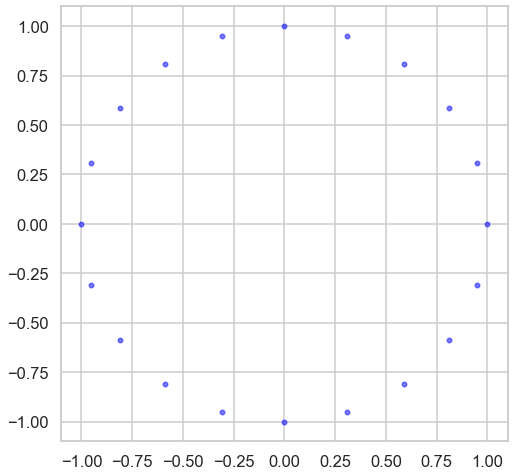

In [58]:
# prepare the figure sise and background 
# this part can be replaced by a number of subplots 
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
# Produce a data set that represent the x and y o coordinates of a circle 
# this part can be replaced by data that you import froma file 
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
# Data is displayed 
# to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 
display_cluster(X)

> #### 2.3. Example 2 : Multi blob Data Gen and display 

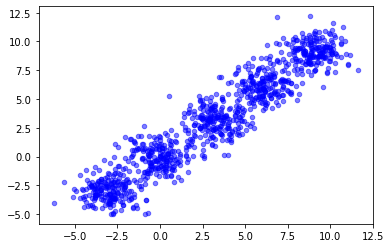

In [25]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
display_cluster(X)

#### 2.3. Example 3 : moons Data Gen and display 

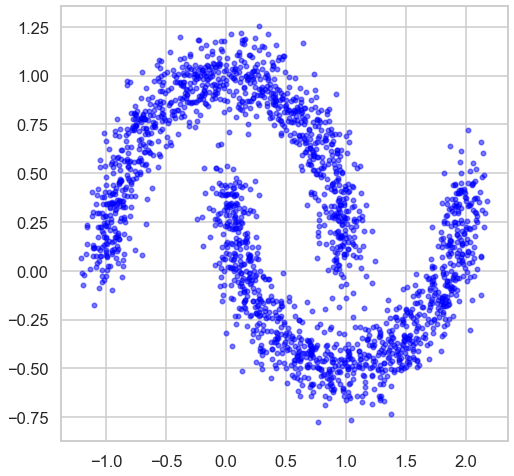

In [102]:
n_samples = 2000
X, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
display_cluster(X)

## 3. Testing the GUC_Kmean function on Simple 2D
1. Apply the GUC_Kmean fucntion to 2D Data provided by example 1, Example 2 and Example 3
2. Try a varing number of cluster centriods that range from 2 to 10 clusters on each set 
3. Display your results.
4. plot the Cluster perfromance Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

In [21]:
#EXAMPLE 2
n_samples = 1000
X, y= make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
new_data=pd.DataFrame(X)

Points belonging to each cluster: {0: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 2

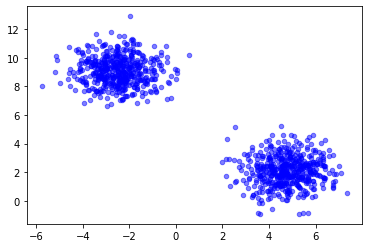

In [23]:
import matplotlib.pyplot as plt
n_samples = 1000
n_bins = 2

Z,cen,ds = GUC_Kmean(new_data,n_bins, "Ecluidian" )
# print(Z)
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=cen, shuffle=False, random_state=42)
display_cluster(X)

Points: {1: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 211, 213, 214, 215, 216, 217, 218, 219, 220, 22

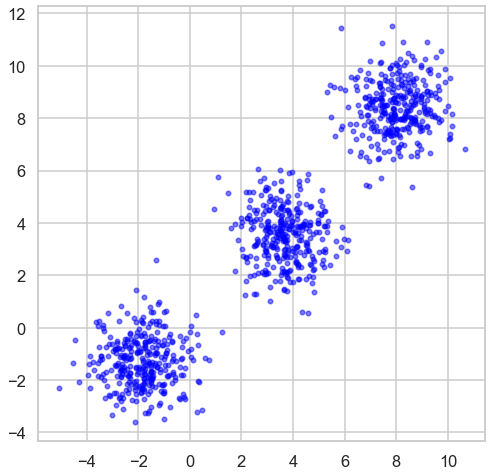

In [64]:
import matplotlib.pyplot as plt
n_samples = 1000
n_bins=3

Z,cen,ds = GUC_Kmean(new_data,n_bins, "Ecluidian" )

X, y= make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=cen, shuffle=False, random_state=42)
display_cluster(X)

Points: {1: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 211, 213, 214, 215, 216, 218, 219, 220, 221, 222, 223, 22

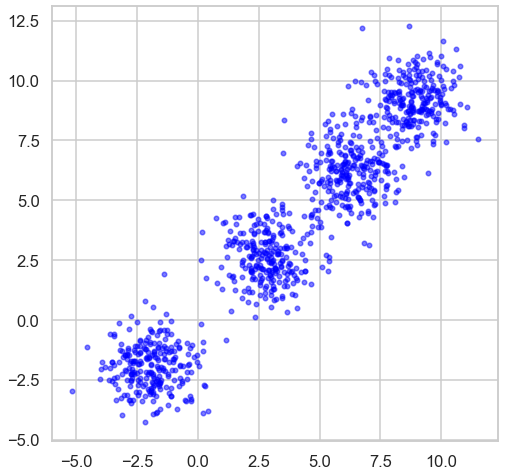

In [65]:
import matplotlib.pyplot as plt
n_samples = 1000
n_bins=4

Z,cen,ds = GUC_Kmean(new_data,n_bins, "Ecluidian" )

X, y= make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=cen, shuffle=False, random_state=42)
display_cluster(X)

Points: {1: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 215, 272, 283, 370], 2: [104, 126, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 211, 212, 213, 214, 21

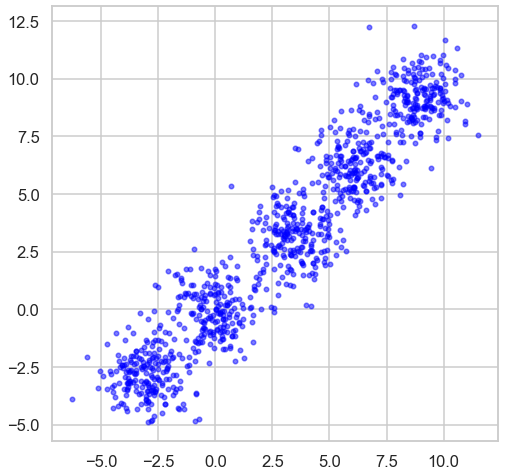

In [66]:
import matplotlib.pyplot as plt
n_samples = 1000
n_bins=5

Z,cen,ds = GUC_Kmean(new_data,n_bins, "Ecluidian" )

X, y= make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=cen, shuffle=False, random_state=42)
display_cluster(X)

Points: {1: [0, 2, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 16, 17, 18, 19, 21, 22, 24, 25, 26, 28, 30, 31, 34, 37, 38, 39, 40, 42, 44, 46, 47, 48, 49, 50, 51, 52, 54, 55, 57, 58, 60, 61, 63, 64, 65, 66, 68, 69, 71, 73, 75, 76, 77, 79, 80, 81, 84, 85, 86, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 102, 107, 108, 109, 110, 111, 113, 114, 115, 116, 118, 119, 120, 122, 123, 125, 127, 128, 130, 131, 132, 133, 134, 135, 137, 138, 139, 141, 142, 143, 144, 145, 146, 147, 150, 152, 153, 154, 158, 159, 162, 165, 166, 168, 169, 170, 171, 172, 173, 174, 176, 177, 178, 179, 181, 182, 183, 184, 185, 190, 191, 192, 194, 195, 197, 198], 2: [1, 3, 10, 15, 20, 23, 27, 29, 32, 33, 35, 36, 41, 43, 45, 53, 56, 59, 62, 67, 70, 72, 74, 78, 82, 83, 87, 88, 89, 100, 101, 103, 105, 106, 112, 117, 121, 124, 126, 129, 136, 140, 148, 149, 151, 155, 156, 157, 160, 161, 163, 164, 167, 175, 180, 186, 187, 188, 189, 193, 196, 199, 200, 215, 221, 235, 242, 249, 262, 272, 283, 284, 303, 317, 319, 323, 337, 351, 370, 374, 375], 3

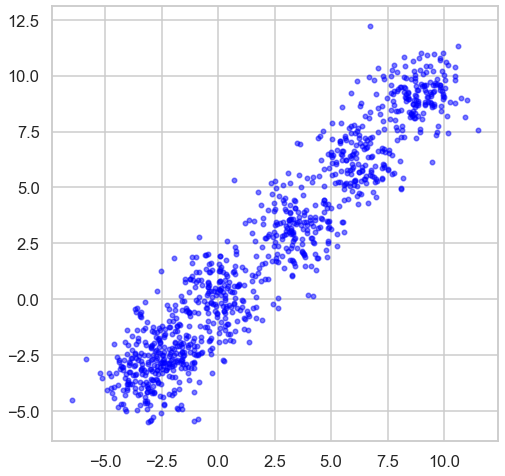

In [68]:
import matplotlib.pyplot as plt
n_samples = 1000
n_bins=6

Z,cen,ds = GUC_Kmean(new_data,n_bins, "Ecluidian" )

X, y= make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=cen, shuffle=False, random_state=42)
display_cluster(X)

## 4. Using the GUC_Kmean function to segment customers int he provided customer dataset
1. Apply the GUC_Kmean fucntion to customer data  
2. Try a varing number of cluster that range from 2 to 10 cluster on each set 
3. Display your results.
4. plot the Cluster Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

In [69]:
GUC_Kmean ( mydf,2,"Ecluidian" )

<ipython-input-46-2059aacee635>:7: RuntimeWarning: invalid value encountered in sqrt
  distance = np.sqrt(dist) # euclid distance formula


Points: {1: [0, 2, 10, 11, 12, 13, 14, 15, 16, 20, 22, 23, 24, 25, 26, 28, 31, 33, 35, 37, 38, 39, 41, 42, 47, 48, 49, 50, 52, 53, 54, 55, 59, 60, 61, 64, 66, 68, 69, 71, 73, 76, 79, 81, 82, 83, 84, 85, 86, 89, 90, 91, 92, 93, 96, 97, 98, 100, 101, 102, 103, 104, 110, 111, 112, 114, 115, 117, 120, 122, 123, 124, 125, 126, 127, 129, 132, 133, 135, 137, 138, 139, 140, 143, 144, 146, 147, 148, 150, 151, 155, 156, 157, 159, 160, 161, 162, 164, 166, 168, 169, 170, 171, 173, 174, 176, 177, 178, 179, 182, 184, 185, 187, 188, 189, 191, 192, 193, 194, 196, 197, 198, 201, 202, 203, 204, 206, 207, 208, 210, 211, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 228, 229, 231, 232, 233, 234, 235, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 254, 255, 256, 257, 258, 259, 260, 261, 263, 264, 265, 267, 269, 270, 273, 275, 276, 277, 281, 282, 283, 286, 288, 289, 290, 296, 297, 298, 300, 302, 303, 306, 307, 308, 309, 310, 313, 314, 315, 316, 317, 318, 319, 3

(                 1              2
 0     20960.915208   45239.917064
 1     47063.890669   19136.919635
 2     14499.118703   80699.910173
 3     67855.890015    1655.094347
 4     45321.893113   20878.913039
 ...            ...            ...
 1995  19815.893419   46384.910176
 1996  14034.890885   52165.911795
 1997  17309.111205   83509.910465
 1998   5741.119666   71941.911917
 1999  35293.112060  101493.911136
 
 [2000 rows x 2 columns],
 [Sex                     0
  Marital status          1
  Age                    30
  Education               1
  Income             103699
  Occupation              1
  Settlement size         1
  Name: 960, dtype: int64,
  Sex                     1
  Marital status          1
  Age                    26
  Education               1
  Income             169991
  Occupation              2
  Settlement size         0
  Name: 572, dtype: int64],
 [429342937.97160244, 1112501894.9769673])

In [359]:
GUC_Kmean ( mydf, 3,  "Ecluidian" )

<ipython-input-163-2059aacee635>:7: RuntimeWarning: invalid value encountered in sqrt
  distance = np.sqrt(dist) # euclid distance formula


(                 1             2              3
 0      6681.937835  34206.305532   72906.123677
 1     19421.132813  60309.288365   46803.125130
 2     42141.875144   1253.828663  108366.120143
 3     40213.127045  81101.288571   26011.120041
 4     17679.132979  58567.291305   48545.120867
 ...            ...           ...            ...
 1995   7826.879245  33061.290948   74051.120101
 1996  13607.877914  27280.287981   79832.121803
 1997  44951.874158   4063.712821  111176.120775
 1998  33383.876482   7504.291782   99608.122009
 1999  62935.874931  22047.713625  129160.121404
 
 [2000 rows x 3 columns],
 [Sex                     1
  Marital status          1
  Age                    20
  Education               1
  Income             131370
  Occupation              1
  Settlement size         2
  Name: 865, dtype: int64,
  Sex                    0
  Marital status         1
  Age                   30
  Education              1
  Income             90500
  Occupation             2

In [94]:
GUC_Kmean ( mydf, 4,  "Ecluidian" )

<ipython-input-3-2059aacee635>:7: RuntimeWarning: invalid value encountered in sqrt
  distance = np.sqrt(dist) # euclid distance formula


Points belonging to each cluster: {0: [0, 10, 11, 12, 14, 16, 20, 24, 28, 31, 35, 37, 38, 41, 42, 48, 49, 53, 59, 60, 61, 64, 66, 68, 69, 76, 79, 83, 85, 86, 90, 91, 93, 98, 101, 103, 104, 110, 111, 112, 114, 115, 117, 120, 124, 125, 127, 129, 133, 135, 137, 138, 139, 143, 144, 146, 147, 148, 150, 151, 156, 160, 161, 162, 164, 166, 168, 169, 173, 174, 176, 177, 178, 179, 184, 185, 188, 189, 191, 193, 194, 196, 197, 198, 202, 206, 207, 208, 210, 211, 214, 216, 217, 219, 223, 224, 225, 229, 231, 232, 235, 237, 238, 239, 240, 241, 242, 243, 244, 246, 247, 248, 250, 251, 252, 254, 255, 257, 259, 260, 261, 263, 265, 267, 270, 273, 275, 276, 281, 282, 283, 286, 288, 289, 296, 298, 303, 306, 308, 315, 317, 321, 324, 329, 331, 334, 337, 338, 344, 347, 350, 351, 354, 356, 359, 360, 365, 366, 367, 368, 370, 372, 376, 380, 382, 383, 384, 385, 389, 390, 391, 393, 397, 398, 399, 400, 401, 404, 405, 406, 410, 413, 414, 419, 421, 424, 425, 426, 430, 433, 434, 435, 441, 442, 446, 447, 452, 454, 456, 4

(                 0             1             2              3
 0      9781.671779  29567.242280  45473.984558  100454.869174
 1     35884.619584   3464.282763  71576.971955   74351.870111
 2     25678.386765  65027.231295  10013.985283  135914.866759
 3     56676.618391  17327.769719  92368.972088   53559.866679
 4     34142.622458   5206.244778  69834.974299   76093.867139
 ...            ...           ...           ...            ...
 1995   8636.626643  30712.231429  44328.973663  101599.866725
 1996   2855.627251  36493.233465  38547.971562  107380.868125
 1997  28488.382854  67837.231533   7203.971395  138724.867359
 1998  16920.385865  56269.233354  18771.973007  127156.868358
 1999  46472.383586  85821.232278  10780.031290  156708.867915
 
 [2000 rows x 4 columns],
 [Sex                     0
  Marital status          0
  Age                    50
  Education               1
  Income             114853
  Occupation              1
  Settlement size         0
  Name: 843, dtype: 

In [97]:
GUC_Kmean ( mydf, 5,  "Ecluidian" )

<ipython-input-3-2059aacee635>:7: RuntimeWarning: invalid value encountered in sqrt
  distance = np.sqrt(dist) # euclid distance formula


Points belonging to each cluster: {0: [0, 4, 5, 11, 16, 19, 21, 23, 28, 31, 36, 37, 38, 41, 42, 44, 45, 46, 48, 49, 54, 61, 65, 67, 72, 73, 74, 76, 79, 81, 85, 88, 93, 96, 97, 98, 109, 110, 112, 114, 115, 123, 128, 129, 131, 137, 138, 142, 145, 147, 148, 150, 156, 158, 160, 162, 164, 165, 167, 168, 176, 177, 178, 189, 192, 194, 195, 197, 198, 200, 202, 214, 217, 219, 224, 230, 231, 232, 235, 237, 242, 244, 253, 255, 258, 261, 266, 271, 273, 278, 279, 283, 286, 288, 296, 301, 305, 311, 312, 317, 322, 323, 327, 328, 331, 338, 342, 349, 353, 354, 356, 360, 362, 367, 368, 369, 371, 388, 390, 394, 397, 398, 399, 404, 409, 412, 415, 423, 424, 427, 430, 432, 437, 440, 447, 453, 454, 455, 456, 457, 459, 460, 465, 470, 473, 476, 477, 483, 484, 485, 486, 499, 501, 502, 503, 512, 514, 518, 520, 523, 526, 531, 535, 537, 539, 541, 542, 553, 556, 557, 560, 565, 568, 571, 576, 578, 589, 591, 592, 594, 599, 600, 605, 613, 617, 618, 620, 622, 624, 626, 627, 630, 636, 639, 644, 646, 647, 658, 662, 663, 

(                 0             1             2             3              4
 0      7195.951035  43520.935788  50293.569303  18836.721918  113560.372098
 1     18907.112357  17417.940060  76396.558127  44939.691052   87457.372770
 2     42655.896301  78980.928910  14833.566618  16623.318595  149020.369951
 3     39699.105496   3374.072882  97188.558199  65731.691081   66665.369874
 4     17165.110995  19159.931764  74654.560219  43197.694819   89199.370274
 ...            ...           ...           ...           ...            ...
 1995   8340.899348  44665.928905  49148.559533  17691.696001  114705.369918
 1996  14121.899876  50446.930819  43367.557737  11910.691059  120486.371152
 1997  45465.895699  81790.929341  12023.557521  19433.310259  151830.370489
 1998  33897.898219  70222.930902  23591.558904   7865.314612  140262.371386
 1999  63449.896513  99774.930042   5960.447401  37417.310896  169814.371006
 
 [2000 rows x 5 columns],
 [Sex                     0
  Marital status    

In [98]:
GUC_Kmean ( mydf, 6,  "Ecluidian" )

<ipython-input-3-2059aacee635>:7: RuntimeWarning: invalid value encountered in sqrt
  distance = np.sqrt(dist) # euclid distance formula


Points belonging to each cluster: {0: [0, 11, 16, 20, 28, 31, 37, 38, 41, 42, 48, 49, 53, 59, 61, 64, 76, 79, 85, 91, 93, 98, 103, 110, 112, 114, 115, 124, 129, 133, 137, 138, 147, 148, 150, 156, 160, 162, 164, 168, 169, 174, 176, 177, 178, 179, 189, 191, 194, 197, 198, 202, 206, 208, 210, 214, 216, 217, 219, 223, 224, 231, 232, 235, 237, 239, 241, 242, 244, 247, 248, 250, 251, 252, 255, 261, 267, 273, 281, 283, 286, 288, 296, 298, 317, 331, 334, 338, 344, 354, 356, 360, 366, 367, 368, 370, 376, 380, 383, 390, 397, 398, 399, 401, 404, 406, 419, 421, 424, 425, 430, 442, 446, 447, 452, 454, 456, 457, 459, 460, 468, 470, 473, 475, 476, 484, 486, 489, 492, 499, 500, 503, 512, 514, 518, 521, 523, 526, 530, 535, 539, 541, 546, 553, 556, 558, 560, 562, 565, 575, 576, 577, 578, 586, 589, 591, 592, 599, 600, 604, 605, 611, 613, 617, 620, 622, 626, 627, 629, 630, 636, 639, 646, 647, 648, 652, 655, 660, 662, 667, 673, 674, 680, 686, 687, 688, 692, 704, 707, 716, 717, 718, 723, 725, 734, 737, 739,

(                 0             1             2              3              4  \
 0      2496.780576  22627.872375  23892.995256   55651.426678  120083.518630   
 1     28599.596816   3475.190793  49995.970215   29548.429509   93980.519570   
 2     32963.409287  58087.857005  11567.043631   91111.421879  155543.516730   
 3     49391.593873  24267.144225  70787.970470    8756.421867   73188.516676   
 4     26857.598235   1733.192213  48253.973902   31290.423152   95722.516982   
 ...            ...           ...           ...            ...            ...   
 1995   1351.634999  23772.857379  22747.974342   56796.421838  121228.516706   
 1996   4429.417096  29553.859208  16966.969930   62577.423874  127009.518005   
 1997  35773.407327  60897.856996  14377.030872   93921.422546  158353.517339   
 1998  24205.410115  49329.858936   2809.041766   82353.424015  146785.518238   
 1999  53757.408118  78881.857751  32361.031518  111905.423237  176337.517859   
 
                   5  
 0 

In [99]:
GUC_Kmean ( mydf, 7,  "Ecluidian" )

<ipython-input-3-2059aacee635>:7: RuntimeWarning: invalid value encountered in sqrt
  distance = np.sqrt(dist) # euclid distance formula


Points belonging to each cluster: {0: [0, 5, 11, 16, 19, 23, 36, 37, 41, 42, 44, 45, 46, 48, 49, 54, 61, 67, 72, 73, 74, 76, 79, 81, 85, 93, 96, 97, 109, 110, 112, 114, 115, 123, 128, 129, 137, 138, 142, 145, 147, 148, 156, 158, 160, 162, 164, 165, 168, 176, 177, 178, 189, 192, 194, 198, 200, 202, 214, 217, 219, 224, 230, 231, 232, 235, 237, 242, 244, 253, 255, 258, 261, 271, 278, 279, 283, 286, 288, 296, 301, 305, 311, 312, 317, 322, 328, 331, 338, 349, 353, 354, 356, 360, 362, 368, 369, 371, 388, 390, 394, 397, 399, 404, 409, 412, 415, 423, 424, 430, 432, 440, 447, 453, 454, 455, 456, 459, 460, 465, 470, 473, 476, 483, 484, 486, 499, 501, 502, 503, 512, 514, 523, 531, 535, 537, 541, 542, 553, 556, 557, 560, 565, 568, 576, 589, 591, 592, 594, 599, 600, 605, 617, 618, 620, 622, 624, 626, 630, 636, 639, 644, 646, 647, 658, 662, 663, 667, 668, 669, 673, 676, 680, 687, 688, 692, 695, 703, 704, 707, 716, 717, 718, 721, 723, 734, 739, 740, 742, 743, 748, 753, 757, 764, 768, 773, 776, 780, 7

(                 0             1             2              3             4  \
 0      7061.983579  37416.338628  32778.260170   82266.956266  13811.451012   
 1     19041.080014  11313.346060  58881.242036   56163.957128  39914.411202   
 2     42521.928761  72876.330155   2681.814165  117726.953085  21648.596189   
 3     39833.072935   9478.671082  79673.242295   35371.952981  60706.410741   
 4     17299.078218  13055.335067  57139.245139   57905.953705  38172.414724   
 ...            ...           ...           ...            ...           ...   
 1995   8206.931677  38561.330203  31633.244859   83411.953041  12666.417145   
 1996  13987.932659  44342.332013  25852.241653   89192.954513   6885.412478   
 1997  45331.928264  75686.330432   5491.759034  120536.953632  24458.590559   
 1998  33763.930863  64118.332050   6076.246249  108968.954738  12890.593768   
 1999  63315.929091  93670.331138  23475.759831  138520.954220  42442.591233   
 
                   5              6  


In [100]:
GUC_Kmean ( mydf, 8,  "Ecluidian" )

<ipython-input-3-2059aacee635>:7: RuntimeWarning: invalid value encountered in sqrt
  distance = np.sqrt(dist) # euclid distance formula


Points belonging to each cluster: {0: [0, 11, 16, 20, 28, 31, 37, 38, 41, 42, 48, 49, 53, 61, 64, 76, 79, 85, 91, 93, 98, 110, 112, 114, 115, 129, 133, 137, 138, 147, 148, 150, 156, 160, 162, 164, 168, 176, 177, 178, 179, 189, 191, 194, 197, 198, 202, 214, 217, 219, 224, 231, 232, 235, 237, 242, 244, 248, 255, 261, 273, 283, 286, 288, 296, 298, 317, 331, 334, 338, 354, 356, 360, 366, 367, 368, 370, 390, 397, 398, 399, 404, 424, 430, 442, 447, 454, 456, 457, 459, 460, 470, 473, 475, 476, 484, 486, 499, 500, 503, 512, 514, 518, 521, 523, 526, 535, 539, 541, 553, 556, 560, 565, 576, 578, 589, 591, 592, 599, 600, 605, 611, 613, 617, 620, 622, 626, 627, 629, 630, 636, 639, 646, 647, 648, 652, 662, 667, 673, 680, 687, 688, 692, 704, 707, 716, 717, 718, 723, 734, 739, 740, 742, 743, 748, 757, 764, 767, 768, 776, 777, 785, 787, 790, 795, 800, 802, 807, 813, 814, 821, 822, 826, 827, 839, 840, 844, 848, 851, 855, 858, 859, 862, 865, 867, 871, 877, 878, 882, 885, 886, 899, 900, 901, 904, 905, 907

(                 0             1             2              3              4  \
 0       258.204983  19856.409229  35219.706555   44044.805666   83544.715893   
 1     25846.504638   6246.634876  61322.690968   17941.810735   57441.716437   
 2     35716.501904  55316.391309    240.850874   79504.799167  119004.712662   
 3     46638.500621  27038.610002  82114.690872    2850.202254   36649.712557   
 4     24104.505044   4504.628964  59580.693375   19683.801654   59183.713316   
 ...            ...           ...           ...            ...            ...   
 1995   1401.533483  21001.391839  34074.692899   45189.799147   84689.712617   
 1996   7182.507651  26782.393597  28293.690600   50970.801292   90470.713974   
 1997  38526.500575  58126.391209   3050.310908   82314.799732  121814.713141   
 1998  26958.503380  46558.393220   8517.694647   70746.801355  110246.714203   
 1999  56510.501392  76110.391972  21034.311554  100298.800452  139798.713712   
 
                  5       

In [101]:
GUC_Kmean ( mydf, 9,  "Ecluidian" )

<ipython-input-3-2059aacee635>:7: RuntimeWarning: invalid value encountered in sqrt
  distance = np.sqrt(dist) # euclid distance formula


Points belonging to each cluster: {0: [0, 11, 16, 23, 31, 37, 41, 42, 48, 49, 54, 61, 73, 76, 79, 81, 85, 93, 96, 97, 98, 110, 112, 114, 115, 123, 129, 137, 138, 147, 148, 156, 160, 162, 164, 168, 176, 177, 178, 189, 192, 194, 197, 198, 200, 202, 214, 217, 219, 224, 231, 232, 235, 237, 242, 244, 255, 258, 261, 271, 273, 278, 283, 286, 288, 296, 317, 331, 338, 354, 356, 360, 362, 368, 369, 390, 397, 398, 399, 404, 424, 430, 432, 447, 454, 456, 457, 459, 460, 470, 473, 476, 484, 486, 499, 503, 512, 514, 523, 526, 531, 535, 539, 541, 553, 556, 560, 565, 576, 578, 589, 591, 592, 594, 599, 600, 605, 617, 620, 622, 624, 626, 630, 636, 639, 644, 646, 647, 662, 663, 667, 673, 676, 680, 687, 688, 692, 704, 707, 716, 717, 718, 723, 734, 739, 740, 742, 743, 748, 757, 764, 768, 773, 776, 777, 780, 785, 795, 802, 807, 813, 814, 821, 826, 827, 839, 840, 844, 845, 848, 851, 858, 859, 865, 867, 871, 876, 878, 886, 899, 901, 904, 907, 910, 912, 916, 918, 928, 933, 944, 949, 956, 959, 961, 971, 974, 976

(                 0             1             2              3              4  \
 0      3123.810164  22806.465467  40958.111239   45661.969040   84040.477814   
 1     22979.324095   3296.595489  67061.099300   19558.974077   57937.478157   
 2     38583.683439  58266.449033   5498.117772   81121.962978  119500.474535   
 3     43771.318400  24088.552643  87853.098792    1233.039123   37145.474430   
 4     21237.322739   1554.615799  65319.100818   21300.965082   59679.475216   
 ...            ...           ...           ...            ...            ...   
 1995   4268.690280  23951.449572  39813.100155   46806.962949   85185.474489   
 1996  10049.688992  29732.450559  34032.098938   52587.965202   90966.475774   
 1997  41393.682817  61076.448680   2688.100469   83931.963629  122310.474969   
 1998  29825.685737  49508.450417  14256.101885   72363.965266  110742.476005   
 1999  59377.683672  79060.449384  15295.904760  101915.964356  140294.475530   
 
                  5       

In [102]:
GUC_Kmean ( mydf, 10,  "Ecluidian" )

<ipython-input-3-2059aacee635>:7: RuntimeWarning: invalid value encountered in sqrt
  distance = np.sqrt(dist) # euclid distance formula


Points belonging to each cluster: {0: [0, 11, 16, 20, 28, 31, 37, 38, 41, 48, 49, 61, 64, 76, 79, 93, 98, 110, 112, 115, 129, 137, 138, 147, 150, 156, 160, 162, 164, 168, 176, 177, 194, 197, 198, 202, 219, 224, 231, 232, 235, 237, 242, 244, 255, 261, 273, 283, 286, 288, 296, 298, 317, 331, 334, 338, 354, 356, 360, 366, 367, 368, 370, 397, 398, 399, 404, 424, 430, 447, 454, 456, 457, 459, 460, 473, 475, 476, 486, 499, 500, 503, 512, 514, 518, 526, 535, 539, 541, 553, 560, 565, 576, 578, 589, 591, 592, 599, 605, 611, 613, 617, 620, 622, 626, 627, 629, 630, 636, 639, 647, 652, 662, 667, 673, 680, 688, 704, 707, 716, 717, 734, 739, 740, 742, 743, 748, 757, 764, 767, 768, 776, 777, 785, 790, 795, 800, 802, 807, 821, 822, 826, 827, 839, 844, 848, 858, 859, 862, 865, 867, 871, 878, 882, 886, 900, 901, 904, 907, 912, 916, 918, 928, 933, 944, 956, 974, 977, 994, 1008, 1010, 1016, 1032, 1039, 1044, 1045, 1053, 1056, 1066, 1067, 1079, 1081, 1087, 1095, 1096, 1102, 1104, 1107, 1109, 1115, 1121, 11

(                 0             1             2              3             4  \
 0       152.598454  32641.516226  41258.344480   54473.048500  14965.468392   
 1     26252.713542   6538.533094  67361.332957   28370.051763  11137.570699   
 2     35310.292969  68101.506260   5798.349512   89933.043662  50425.444358   
 3     47044.709538  14253.494868  88153.332350    7578.043651  31929.556963   
 4     24510.713851   8280.514656  65619.334311   30112.044945   9395.565917   
 ...            ...           ...           ...            ...           ...   
 1995    995.337499  33786.506365  40113.333635   55618.043621  16110.445214   
 1996   6776.299280  39567.508214  34332.332605   61399.045756  21891.447223   
 1997  38120.291658  70911.506470   2988.334222   92743.044372  53235.444232   
 1998  26552.294532  59343.508182  14556.335650   81175.045884  41667.446484   
 1999  56104.292484  88895.507193  14995.671430  110727.045075  71219.445029   
 
                  5             6     

In [60]:
GUC_Kmean ( mydf, 2,  "pearson" )

Points belonging to each cluster: {2: [0, 2, 4, 6, 8, 13, 15, 16, 20, 22, 25, 26, 29, 33, 42, 44, 47, 50, 54, 55, 61, 62, 68, 71, 72, 75, 81, 83, 84, 90, 91, 92, 96, 100, 115, 122, 123, 126, 132, 133, 135, 137, 139, 146, 147, 150, 151, 156, 157, 159, 170, 176, 177, 179, 182, 184, 186, 187, 200, 201, 204, 206, 209, 211, 212, 213, 214, 215, 219, 220, 231, 233, 234, 237, 239, 241, 246, 250, 251, 256, 259, 261, 263, 264, 265, 267, 277, 281, 282, 283, 288, 289, 293, 297, 298, 300, 302, 303, 307, 309, 310, 313, 314, 316, 317, 318, 324, 325, 330, 339, 345, 348, 354, 355, 356, 360, 364, 365, 368, 377, 379, 380, 397, 398, 399, 400, 403, 406, 413, 416, 422, 429, 430, 438, 439, 443, 445, 449, 461, 463, 465, 466, 469, 472, 478, 479, 486, 487, 488, 493, 494, 497, 498, 502, 505, 514, 515, 516, 518, 519, 524, 527, 529, 532, 536, 539, 541, 543, 544, 545, 548, 551, 554, 559, 560, 561, 566, 573, 574, 579, 581, 583, 587, 588, 589, 590, 595, 597, 600, 602, 606, 609, 611, 619, 624, 629, 631, 635, 640, 641,

(        1    2
 0     1.0  1.0
 1     1.0  1.0
 2     1.0  1.0
 3     1.0  1.0
 4     1.0  1.0
 ...   ...  ...
 1995  1.0  1.0
 1996  1.0  1.0
 1997  1.0  1.0
 1998  1.0  1.0
 1999  1.0  1.0
 
 [2000 rows x 2 columns],
 [Sex                    1
  Marital status         1
  Age                   54
  Education              2
  Income             51882
  Occupation             0
  Settlement size        0
  Name: 1444, dtype: int64,
  Sex                    1
  Marital status         1
  Age                   54
  Education              2
  Income             51882
  Occupation             0
  Settlement size        0
  Name: 1444, dtype: int64],
 [7782606911.684543, 3520172488.4945354])

In [28]:
GUC_Kmean ( mydf, 3,  "pearson" )

Points belonging to each cluster: {0: [0, 2, 13, 22, 25, 26, 33, 55, 71, 83, 84, 90, 91, 92, 96, 100, 123, 126, 137, 157, 159, 179, 182, 187, 204, 215, 219, 234, 237, 241, 246, 259, 261, 263, 264, 277, 281, 282, 283, 289, 297, 300, 303, 310, 316, 345, 360, 364, 379, 403, 422, 429, 430, 438, 439, 443, 445, 465, 472, 494, 505, 514, 516, 527, 529, 536, 541, 544, 581, 588, 589, 590, 619, 624, 629, 640, 641, 649, 651, 656, 664, 678, 680, 697, 723, 726, 732, 747, 750, 756, 765, 769, 774, 798, 799, 800, 801, 807, 809, 823, 835, 838, 843, 848, 849, 853, 883, 885, 892, 925, 928, 929, 941, 943, 948, 950, 957, 958, 972, 976, 978, 987, 989, 1000, 1004, 1006, 1008, 1010, 1016, 1017, 1023, 1026, 1032, 1044, 1051, 1053, 1063, 1064, 1066, 1071, 1075, 1077, 1079, 1081, 1087, 1088, 1096, 1099, 1100, 1112, 1115, 1121, 1138, 1142, 1143, 1207, 1239, 1246, 1276, 1291, 1292, 1301, 1316, 1324, 1358, 1368, 1369, 1372, 1373, 1374, 1375, 1379, 1381, 1390, 1391, 1393, 1394, 1397, 1399, 1410, 1428, 1432, 1433, 144

(                 0             1             2
 0     3.714714e-10  4.991059e-08  1.867115e-08
 1     6.632720e-08  2.497774e-09  1.870456e-08
 2     7.809998e-10  5.550059e-08  2.210513e-08
 3     3.002259e-08  1.194182e-09  2.753260e-09
 4     1.181395e-08  9.847794e-09  1.647437e-10
 ...            ...           ...           ...
 1995  8.217592e-09  1.377672e-08  9.568029e-10
 1996  3.941921e-08  1.379196e-10  6.080618e-09
 1997  1.074476e-08  1.086580e-08  3.141051e-10
 1998  3.502413e-08  5.439542e-10  4.484302e-09
 1999  9.812609e-09  1.184840e-08  4.954078e-10
 
 [2000 rows x 3 columns],
 [Sex                    0
  Marital status         0
  Age                   48
  Education              1
  Income             94024
  Occupation             0
  Settlement size        0
  Name: 989, dtype: int64,
  Sex                     1
  Marital status          1
  Age                    24
  Education               1
  Income             110137
  Occupation              1
  Settlement

In [96]:
GUC_Kmean ( mydf, 4,  "pearson" )

Points belonging to each cluster: {0: [0, 2, 13, 22, 26, 33, 71, 83, 84, 90, 126, 137, 157, 179, 182, 187, 204, 234, 259, 263, 277, 297, 300, 316, 364, 379, 422, 429, 430, 438, 443, 516, 527, 529, 544, 588, 590, 619, 629, 640, 649, 656, 678, 697, 756, 769, 774, 799, 807, 823, 849, 883, 929, 943, 948, 950, 972, 978, 989, 1004, 1010, 1053, 1075, 1081, 1121, 1143, 1239, 1301, 1324, 1368, 1374, 1381, 1390, 1391, 1397, 1399, 1410, 1432, 1433, 1444, 1446, 1457, 1469, 1480, 1503, 1537, 1547, 1554, 1569, 1570, 1572, 1576, 1578, 1589, 1607, 1609, 1611, 1639, 1675, 1686, 1695, 1697, 1707, 1714, 1724, 1726, 1753, 1762, 1771, 1785, 1789, 1791, 1795, 1797, 1800, 1811, 1816, 1821, 1828, 1831, 1839, 1858, 1860, 1862, 1894, 1898, 1926, 1937, 1946, 1948, 1958, 1965, 1975, 1977, 1992], 1: [1, 5, 7, 9, 10, 11, 12, 17, 18, 19, 24, 30, 31, 32, 34, 35, 36, 40, 41, 43, 45, 49, 51, 57, 58, 59, 60, 63, 64, 67, 69, 70, 79, 85, 86, 87, 88, 93, 95, 99, 101, 102, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 1

(                 0             1             2             3
 0     1.998664e-09  5.355719e-08  2.735946e-08  7.365532e-09
 1     9.982225e-08  1.761153e-09  1.165479e-08  3.530001e-08
 2     9.417944e-10  5.934970e-08  3.151070e-08  9.515692e-09
 3     5.368029e-08  1.812053e-09  5.610732e-10  1.073354e-08
 4     2.791953e-08  1.150473e-08  1.701274e-09  1.533803e-09
 ...            ...           ...           ...           ...
 1995  2.220058e-08  1.572473e-08  3.537728e-09  4.653802e-10
 1996  6.600814e-08  3.537776e-10  2.435412e-09  1.662665e-08
 1997  2.625688e-08  1.260438e-08  2.139792e-09  1.166085e-09
 1998  6.025559e-08  9.438262e-10  1.507429e-09  1.384493e-08
 1999  2.478635e-08  1.366106e-08  2.586874e-09  8.761060e-10
 
 [2000 rows x 4 columns],
 [Sex                    0
  Marital status         0
  Age                   41
  Education              1
  Income             69062
  Occupation             0
  Settlement size        0
  Name: 529, dtype: int64,
  Sex       

In [29]:
GUC_Kmean ( mydf, 5,  "pearson" )

Points belonging to each cluster: {0: [0, 2, 8, 16, 20, 22, 25, 26, 44, 54, 55, 61, 75, 83, 84, 90, 91, 92, 96, 100, 123, 126, 133, 137, 139, 147, 159, 179, 182, 201, 204, 211, 215, 219, 231, 234, 237, 241, 246, 251, 256, 259, 261, 263, 264, 277, 281, 282, 283, 289, 297, 302, 303, 307, 310, 316, 325, 345, 356, 360, 364, 379, 403, 416, 422, 439, 445, 465, 472, 478, 479, 487, 488, 494, 498, 505, 514, 516, 527, 536, 541, 545, 551, 579, 581, 588, 589, 609, 611, 624, 629, 631, 635, 641, 649, 651, 656, 662, 664, 680, 693, 709, 713, 723, 726, 732, 745, 747, 750, 765, 779, 782, 798, 800, 801, 807, 809, 811, 813, 816, 835, 838, 843, 848, 853, 885, 891, 892, 908, 925, 928, 929, 941, 943, 948, 950, 956, 957, 958, 969, 975, 976, 978, 984, 987, 989, 990, 991, 994, 1000, 1001, 1006, 1008, 1010, 1016, 1017, 1023, 1026, 1032, 1035, 1040, 1044, 1051, 1053, 1056, 1063, 1064, 1066, 1071, 1072, 1077, 1079, 1081, 1087, 1088, 1096, 1099, 1100, 1102, 1106, 1109, 1112, 1115, 1121, 1134, 1138, 1142, 1151, 1152

(                 0             1             2             3             4
 0     3.123571e-09  6.180769e-08  3.959031e-08  1.912894e-08  1.739436e-08
 1     4.762260e-08  6.201961e-10  5.534779e-09  1.824714e-08  1.633857e-07
 2     4.517215e-09  6.802685e-08  4.457102e-08  2.260777e-08  1.412981e-08
 3     1.794228e-08  3.570464e-09  1.061621e-10  2.579344e-09  1.023723e-07
 4     4.818128e-09  1.548944e-08  5.593648e-09  2.079049e-10  6.519708e-08
 ...            ...           ...           ...           ...           ...
 1995  2.648433e-09  2.032940e-08  8.639840e-09  1.063012e-09  5.627977e-08
 1996  2.536318e-08  1.244657e-09  2.816001e-10  5.824876e-09  1.191363e-07
 1997  4.146201e-09  1.676246e-08  6.365162e-09  3.751943e-10  6.264303e-08
 1998  2.187898e-08  2.229208e-09  1.268423e-10  4.267236e-09  1.113419e-07
 1999  3.576495e-09  1.797783e-08  7.122076e-09  5.719804e-10  6.035882e-08
 
 [2000 rows x 5 columns],
 [Sex                     0
  Marital status          0
  Ag

In [30]:
GUC_Kmean ( mydf, 6,  "pearson" )

Points belonging to each cluster: {0: [0, 2, 22, 25, 26, 71, 83, 84, 90, 91, 92, 123, 126, 137, 157, 159, 179, 182, 204, 219, 234, 237, 246, 259, 263, 264, 277, 282, 283, 297, 316, 345, 360, 364, 379, 403, 422, 430, 439, 443, 445, 465, 472, 494, 516, 527, 529, 541, 581, 588, 589, 619, 624, 629, 641, 649, 656, 664, 678, 723, 732, 747, 765, 774, 798, 800, 801, 807, 809, 823, 838, 848, 853, 892, 928, 929, 943, 948, 950, 957, 976, 978, 989, 1000, 1008, 1010, 1016, 1017, 1023, 1032, 1044, 1053, 1079, 1081, 1087, 1088, 1096, 1100, 1112, 1115, 1121, 1142, 1143, 1207, 1239, 1246, 1276, 1291, 1301, 1316, 1369, 1372, 1373, 1374, 1375, 1379, 1381, 1390, 1391, 1393, 1394, 1397, 1428, 1433, 1456, 1457, 1467, 1469, 1473, 1480, 1537, 1551, 1552, 1553, 1554, 1560, 1569, 1570, 1572, 1573, 1576, 1595, 1600, 1607, 1611, 1619, 1627, 1634, 1639, 1643, 1647, 1675, 1686, 1692, 1695, 1697, 1714, 1724, 1725, 1726, 1741, 1753, 1762, 1767, 1771, 1772, 1779, 1785, 1789, 1791, 1792, 1797, 1800, 1811, 1816, 1821, 1

(                 0             1             2             3             4  \
 0     4.488295e-10  6.437494e-08  4.324433e-08  9.328585e-09  2.456009e-08   
 1     6.506314e-08  3.943765e-10  4.279868e-09  3.134448e-08  1.360350e-08   
 2     9.240759e-10  7.072386e-08  4.844659e-08  1.174824e-08  2.850197e-08   
 3     2.917374e-08  4.207783e-09  3.671484e-10  8.605130e-09  1.045237e-09   
 4     1.128352e-08  1.678858e-08  7.018105e-09  8.075355e-10  1.061069e-09   
 ...            ...           ...           ...           ...           ...   
 1995  7.778904e-09  2.181528e-08  1.038637e-08  1.321031e-10  2.587696e-09   
 1996  3.845036e-08  1.626264e-09  8.815926e-11  1.395173e-08  3.363462e-09   
 1997  1.024115e-08  1.811349e-08  7.879087e-09  5.481112e-10  1.415607e-09   
 1998  3.411217e-08  2.729001e-09  1.382072e-10  1.142071e-08  2.235965e-09   
 1999  9.331712e-09  1.937604e-08  8.718926e-09  3.580714e-10  1.782575e-09   
 
                  5  
 0     3.220988e-08  
 1    

In [31]:
GUC_Kmean ( mydf, 7,  "pearson" )

Points belonging to each cluster: {0: [0, 2, 13, 22, 25, 26, 33, 71, 83, 84, 90, 126, 137, 157, 179, 182, 204, 219, 234, 259, 263, 277, 282, 283, 297, 316, 345, 364, 379, 422, 430, 439, 443, 445, 516, 527, 529, 544, 588, 590, 619, 629, 649, 656, 678, 723, 732, 769, 774, 799, 807, 823, 848, 929, 943, 948, 950, 972, 978, 989, 1010, 1016, 1017, 1032, 1044, 1053, 1081, 1087, 1088, 1096, 1112, 1121, 1143, 1239, 1301, 1373, 1374, 1381, 1390, 1391, 1393, 1394, 1397, 1399, 1428, 1433, 1457, 1467, 1469, 1473, 1480, 1537, 1554, 1560, 1569, 1570, 1572, 1576, 1600, 1607, 1611, 1639, 1643, 1647, 1675, 1686, 1695, 1697, 1714, 1724, 1726, 1753, 1762, 1767, 1771, 1785, 1789, 1791, 1797, 1800, 1811, 1816, 1821, 1828, 1831, 1839, 1858, 1862, 1894, 1898, 1907, 1926, 1937, 1943, 1946, 1948, 1965, 1975, 1977, 1992], 1: [1, 7, 9, 11, 17, 18, 32, 40, 43, 51, 57, 58, 63, 67, 70, 79, 93, 99, 105, 108, 113, 116, 118, 130, 134, 136, 141, 142, 152, 153, 154, 167, 180, 181, 194, 205, 208, 217, 226, 230, 236, 258, 

(                 0             1             2             3             4  \
 0     1.454984e-10  6.820931e-08  3.052692e-08  1.673936e-08  4.705575e-08   
 1     7.638743e-08  1.598537e-10  9.735238e-09  2.074235e-08  3.185498e-09   
 2     8.727508e-11  7.474466e-08  3.490191e-08  1.999799e-08  5.248593e-08   
 3     3.690726e-08  5.229824e-09  2.101341e-10  3.566870e-09  7.886890e-10   
 4     1.626282e-08  1.877503e-08  2.555009e-09  3.798883e-11  8.602782e-09   
 ...            ...           ...           ...           ...           ...   
 1995  1.198455e-08  2.407149e-08  4.723049e-09  5.720276e-10  1.229798e-08   
 1996  4.725433e-08  2.273701e-09  1.608347e-09  7.265106e-09  6.069112e-11   
 1997  1.500727e-08  2.017531e-08  3.083583e-09  1.163791e-10  9.555990e-09   
 1998  4.242244e-08  3.547935e-09  8.945666e-10  5.501898e-09  3.173801e-10   
 1999  1.390152e-08  2.150661e-08  3.616502e-09  2.306718e-10  1.047875e-08   
 
                  5             6  
 0     5.64488

In [32]:
GUC_Kmean ( mydf, 8,  "pearson" )

Points belonging to each cluster: {0: [0, 2, 13, 22, 25, 26, 33, 71, 83, 84, 90, 126, 137, 157, 179, 182, 204, 234, 259, 263, 277, 282, 283, 297, 316, 345, 364, 379, 422, 430, 439, 443, 445, 516, 527, 529, 544, 588, 590, 619, 629, 649, 656, 678, 723, 732, 769, 774, 799, 807, 823, 848, 929, 943, 948, 950, 972, 978, 989, 1010, 1016, 1017, 1044, 1053, 1081, 1087, 1088, 1096, 1121, 1143, 1239, 1301, 1374, 1381, 1390, 1391, 1393, 1394, 1397, 1399, 1428, 1433, 1457, 1467, 1469, 1480, 1537, 1554, 1569, 1570, 1572, 1576, 1600, 1607, 1611, 1639, 1643, 1647, 1675, 1686, 1695, 1697, 1714, 1724, 1726, 1753, 1762, 1767, 1771, 1785, 1789, 1791, 1797, 1800, 1811, 1816, 1821, 1828, 1831, 1839, 1858, 1862, 1894, 1898, 1926, 1937, 1946, 1948, 1965, 1975, 1977, 1992], 1: [1, 9, 17, 18, 43, 51, 57, 58, 63, 67, 70, 79, 93, 105, 113, 116, 118, 130, 134, 136, 141, 152, 153, 154, 167, 180, 181, 194, 205, 217, 226, 236, 258, 272, 280, 287, 291, 295, 296, 311, 320, 332, 333, 340, 342, 357, 381, 391, 395, 402, 4

(                 0             1             2             3             4  \
 0     1.675254e-10  7.175436e-08  3.993458e-08  1.549777e-08  5.248159e-08   
 1     7.775056e-08  4.402967e-11  5.409562e-09  2.217968e-08  1.961441e-09   
 2     4.883527e-11  7.845324e-08  4.493193e-08  1.863363e-08  5.821698e-08   
 3     3.785681e-08  6.243954e-09  1.250686e-10  4.177250e-09  1.618702e-09   
 4     1.689458e-08  2.065652e-08  5.723281e-09  1.366363e-11  1.100949e-08   
 ...            ...           ...           ...           ...           ...   
 1995  1.252854e-08  2.619177e-08  8.796866e-09  3.697866e-10  1.514600e-08   
 1996  4.832828e-08  2.947461e-09  2.533445e-10  8.122292e-09  2.791071e-10   
 1997  1.561436e-08  2.212265e-08  6.501106e-09  4.258904e-11  1.208660e-08   
 1998  4.343931e-08  4.374798e-09  1.175658e-10  6.245039e-09  8.147211e-10   
 1999  1.448596e-08  2.351575e-08  7.265893e-09  1.116384e-10  1.312176e-08   
 
                  5             6             7  


In [33]:
GUC_Kmean ( mydf, 9,  "pearson" )

Points belonging to each cluster: {0: [0, 2, 13, 22, 26, 33, 71, 83, 84, 126, 157, 179, 234, 259, 277, 297, 316, 364, 379, 422, 430, 443, 516, 527, 529, 544, 588, 590, 619, 629, 649, 678, 769, 774, 799, 807, 823, 849, 929, 943, 972, 1053, 1143, 1301, 1374, 1391, 1397, 1399, 1457, 1469, 1547, 1569, 1570, 1578, 1607, 1611, 1686, 1697, 1714, 1726, 1762, 1771, 1785, 1789, 1791, 1795, 1797, 1800, 1811, 1816, 1821, 1828, 1831, 1839, 1858, 1862, 1926, 1937, 1948, 1965, 1975], 1: [1, 9, 17, 18, 43, 51, 57, 58, 63, 67, 70, 79, 93, 105, 113, 116, 118, 130, 134, 136, 141, 152, 153, 154, 167, 180, 181, 194, 205, 217, 226, 236, 258, 272, 280, 287, 291, 295, 296, 311, 320, 332, 333, 340, 342, 357, 381, 391, 395, 402, 408, 410, 417, 418, 420, 431, 444, 450, 470, 477, 496, 507, 517, 523, 563, 572, 605, 612, 616, 618, 637, 645, 665, 675, 677, 706, 714, 721, 736, 743, 744, 753, 763, 771, 778, 805, 812, 818, 832, 860, 865, 887, 895, 905, 915, 921, 945, 952, 953, 982, 983, 988, 1003, 1028, 1060, 1074, 108

(                 0             1             2             3             4  \
 0     1.073156e-09  7.188144e-08  4.014790e-08  1.701684e-08  5.264691e-08   
 1     9.204467e-08  4.195755e-11  5.331106e-09  2.042917e-08  1.929692e-09   
 2     3.306140e-10  7.858547e-08  4.515904e-08  2.030786e-08  5.839128e-08   
 3     4.801638e-08  6.281348e-09  1.368906e-10  3.436895e-09  1.647847e-09   
 4     2.387919e-08  2.072450e-08  5.804233e-09  4.855294e-11  1.108535e-08   
 ...            ...           ...           ...           ...           ...   
 1995  1.861710e-08  2.626786e-08  8.897326e-09  6.254752e-10  1.523498e-08   
 1996  5.971269e-08  2.972260e-09  2.386664e-10  7.084990e-09  2.900948e-10   
 1997  2.234423e-08  2.219289e-08  6.587511e-09  1.404803e-10  1.216610e-08   
 1998  5.425464e-08  4.405359e-09  1.151969e-10  5.347950e-09  8.338924e-10   
 1999  2.098944e-08  2.358817e-08  7.357226e-09  2.648151e-10  1.320459e-08   
 
                  5             6             7   

In [35]:
GUC_Kmean ( mydf, 10,  "pearson" )

Points belonging to each cluster: {0: [0, 2, 13, 22, 26, 33, 71, 83, 84, 126, 157, 179, 234, 259, 277, 297, 316, 364, 379, 422, 430, 443, 516, 527, 529, 544, 588, 590, 619, 629, 649, 678, 769, 774, 799, 807, 823, 849, 929, 943, 972, 1053, 1143, 1301, 1374, 1391, 1397, 1399, 1457, 1469, 1547, 1569, 1570, 1578, 1607, 1611, 1686, 1697, 1714, 1726, 1762, 1771, 1785, 1789, 1791, 1795, 1797, 1800, 1811, 1816, 1821, 1828, 1831, 1839, 1858, 1862, 1926, 1937, 1948, 1965, 1975], 1: [1, 9, 17, 43, 58, 63, 67, 93, 105, 113, 116, 118, 130, 134, 136, 152, 153, 167, 180, 194, 226, 236, 272, 280, 287, 291, 295, 296, 332, 333, 340, 381, 395, 408, 417, 420, 431, 450, 496, 517, 572, 616, 618, 637, 665, 675, 677, 706, 714, 736, 744, 763, 771, 805, 812, 818, 832, 860, 865, 887, 895, 915, 921, 945, 953, 982, 1003, 1060, 1074, 1114, 1200, 1235, 1306], 2: [3, 5, 14, 24, 27, 28, 39, 45, 46, 52, 53, 56, 60, 66, 74, 76, 78, 80, 82, 97, 102, 109, 110, 114, 138, 158, 160, 162, 169, 171, 175, 183, 190, 192, 193, 19

(                 0             1             2             3             4  \
 0     1.073156e-09  7.617352e-08  3.547672e-08  1.573794e-08  5.822941e-08   
 1     9.204467e-08  2.361900e-11  7.231795e-09  2.189580e-08  1.032819e-09   
 2     3.306140e-10  8.307572e-08  4.018915e-08  1.889657e-08  6.426763e-08   
 3     4.801638e-08  7.594891e-09  7.240319e-12  4.054144e-09  2.750899e-09   
 4     2.387919e-08  2.305957e-08  4.117453e-09  1.514977e-11  1.372403e-08   
 ...            ...           ...           ...           ...           ...   
 1995  1.861710e-08  2.888892e-08  6.778810e-09  4.057629e-10  1.830122e-08   
 1996  5.971269e-08  3.889671e-09  7.156401e-10  7.949753e-09  7.940322e-10   
 1997  2.234423e-08  2.460751e-08  4.781236e-09  5.437650e-11  1.492390e-08   
 1998  5.425464e-08  5.503720e-09  3.174857e-10  6.095124e-09  1.611017e-09   
 1999  2.098944e-08  2.607562e-08  5.439972e-09  1.323124e-10  1.607186e-08   
 
                  5             6             7   